```{contents}
```

# Lasso Regression

**Lasso** stands for **Least Absolute Shrinkage and Selection Operator**.
It’s a **linear regression** technique that uses **L1 regularization** to:

* Reduce overfitting.
* Perform **feature selection** by shrinking some coefficients to exactly **zero**.

---

## The L1 Regularization Formula

In **ordinary least squares (OLS)**, we minimize:

$$
\text{Loss} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

In **Lasso**, we add a penalty term:

$$
\text{Loss} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p |\beta_j|
$$

Where:

* $\lambda$ = regularization parameter (controls penalty strength).
* $|\beta_j|$ = absolute value of coefficient.
* Intercept ($\beta_0$) is usually not penalized.

---

## Effect of L1 Penalty

* **If λ = 0** → Same as OLS (no regularization).
* **If λ is small** → Slight shrinkage, coefficients reduced but most remain non-zero.
* **If λ is large** → Many coefficients shrink to **exactly zero** (feature elimination).

---

## Why Lasso Can Zero Out Coefficients

Mathematically, the **absolute value function** creates sharp corners in the cost function's geometry (diamond-shaped constraint), so the optimization often hits exactly zero for some coefficients.
This is **different from Ridge (L2)**, which only shrinks coefficients but never makes them exactly zero.

---

## When to Use Lasso

✅ When you suspect **many irrelevant features**.
✅ When you want **automatic feature selection**.
✅ When you have **high-dimensional data** (p >> n).

---

## Visual Intuition

* Think of it as forcing coefficients to live inside a **diamond-shaped boundary**.
* Because of the diamond’s corners, optimization naturally “sticks” some coefficients at zero.



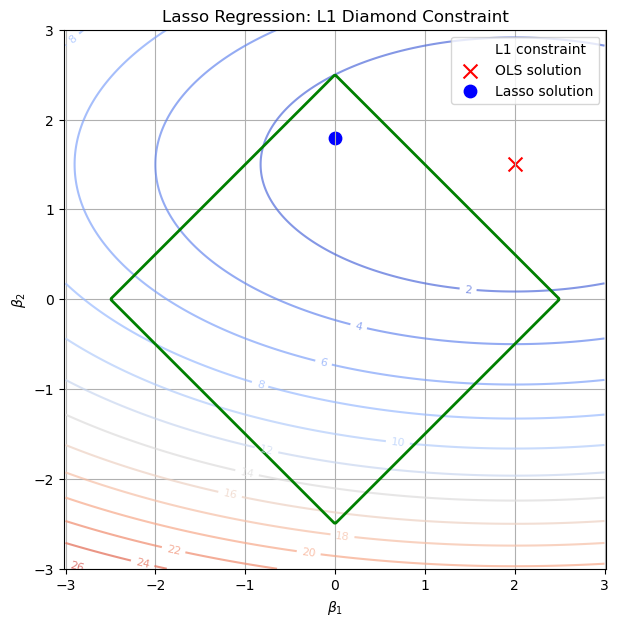

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
# Create grid of coefficients
beta1 = np.linspace(-3, 3, 400)
beta2 = np.linspace(-3, 3, 400)
B1, B2 = np.meshgrid(beta1, beta2)

# Lasso constraint (diamond): |beta1| + |beta2| <= t
lasso_constraint = np.abs(B1) + np.abs(B2)

# Example OLS solution (unregularized minimum)
ols_point = np.array([2.0, 1.5])

# Simulated contour of RSS (elliptical error surface)
rss = (B1 - ols_point[0])**2/4 + (B2 - ols_point[1])**2

plt.figure(figsize=(7,7))

# RSS contours
cs = plt.contour(B1, B2, rss, levels=15, cmap="coolwarm", alpha=0.7)
plt.clabel(cs, inline=1, fontsize=8)

diamond_boundary = plt.contour(
    B1, B2, lasso_constraint,
    levels=[2.5],
    colors="green",
    linewidths=2,
    label="L1 constraint"
)


# Lasso constraint region (diamond)
# diamond_boundary = plt.contour(B1, B2, lasso_constraint, levels=[2.5], colors="green", linewidths=2)
# diamond_boundary.collections[0].set_label("L1 constraint")

# Mark OLS solution
plt.scatter(*ols_point, color="red", marker="x", s=100, label="OLS solution")

# Approx Lasso solution (where ellipse first touches diamond corner)
lasso_point = np.array([0, 1.8])  # coefficient on β1 shrinks to zero
plt.scatter(*lasso_point, color="blue", marker="o", s=80, label="Lasso solution")

plt.xlabel(r"$\beta_1$")
plt.ylabel(r"$\beta_2$")
plt.title("Lasso Regression: L1 Diamond Constraint")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


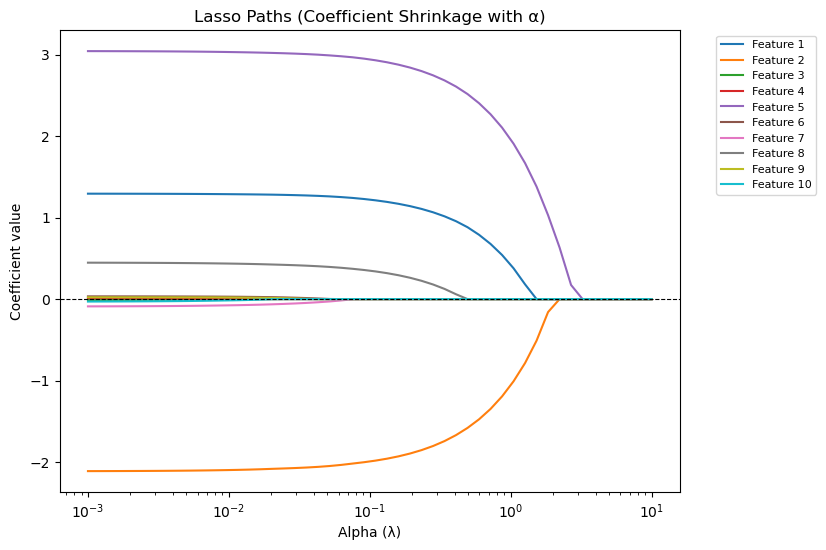

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)
X = np.random.randn(100, 10)
y = X @ np.array([1.5, -2, 0, 0, 3, 0, 0, 0.5, 0, 0]) + np.random.randn(100) * 0.5

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range of alpha values
alphas = np.logspace(-3, 1, 50)
coefs = []

# Fit Lasso for each alpha
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_scaled, y)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)

# Plot coefficient paths
plt.figure(figsize=(8, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=f"Feature {i+1}")

plt.xscale("log")
plt.xlabel("Alpha (λ)")
plt.ylabel("Coefficient value")
plt.title("Lasso Paths (Coefficient Shrinkage with α)")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.show()